In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("wine.csv")

In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Task 1: Exploratory Data Analysis (EDA):

In [4]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


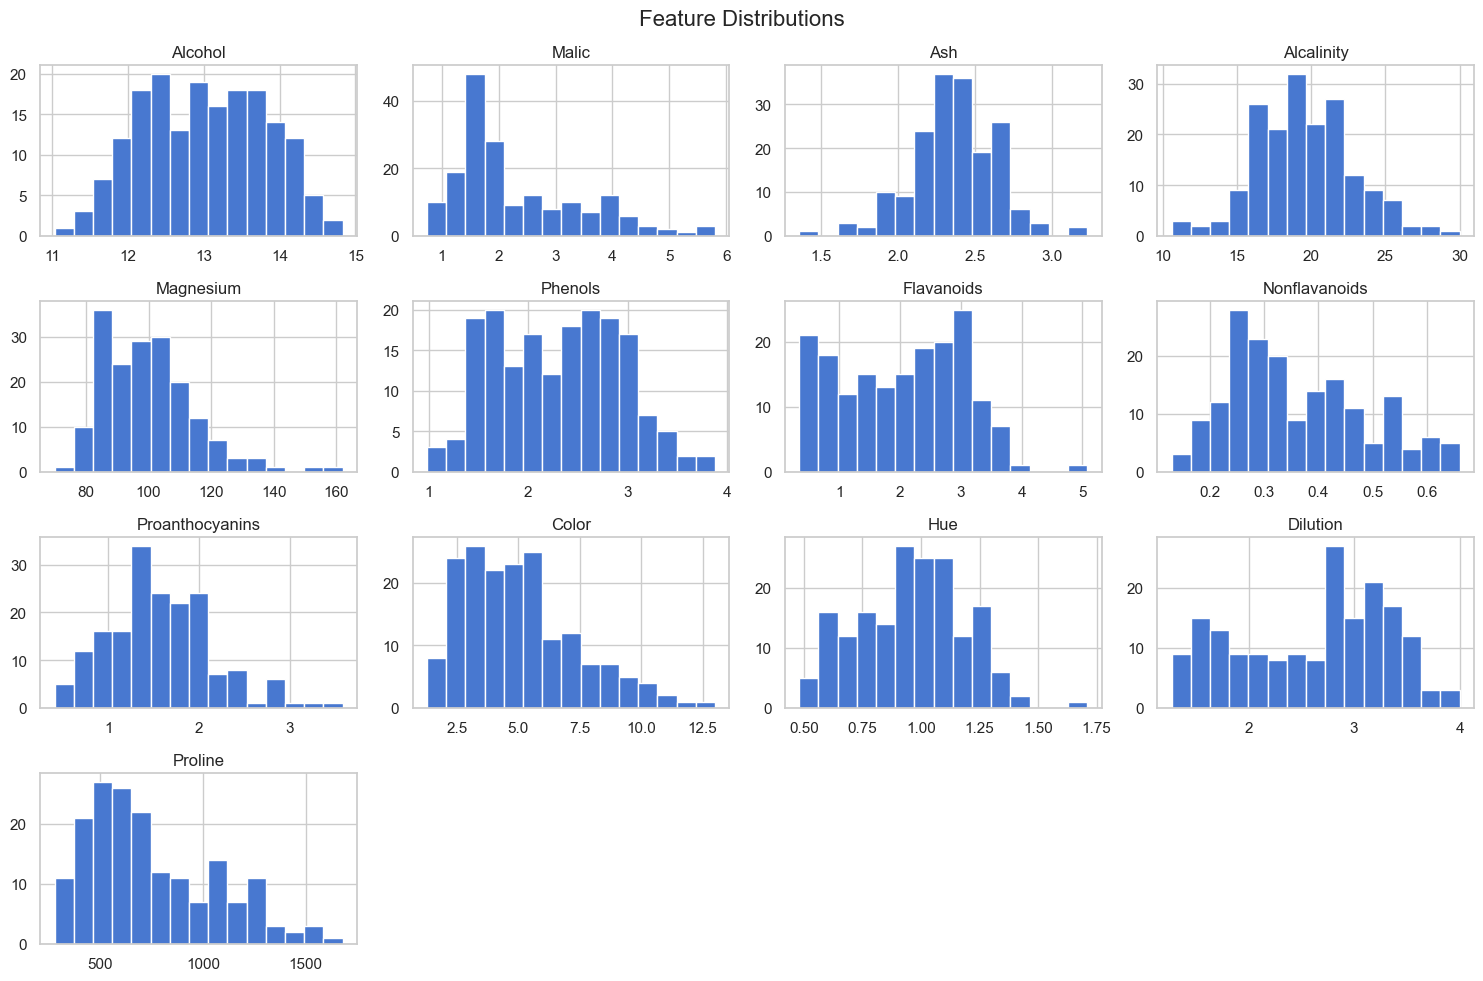

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='muted')

#plotting histograms for each numerical column (excluding 'Type')
data.drop('Type', axis=1).hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

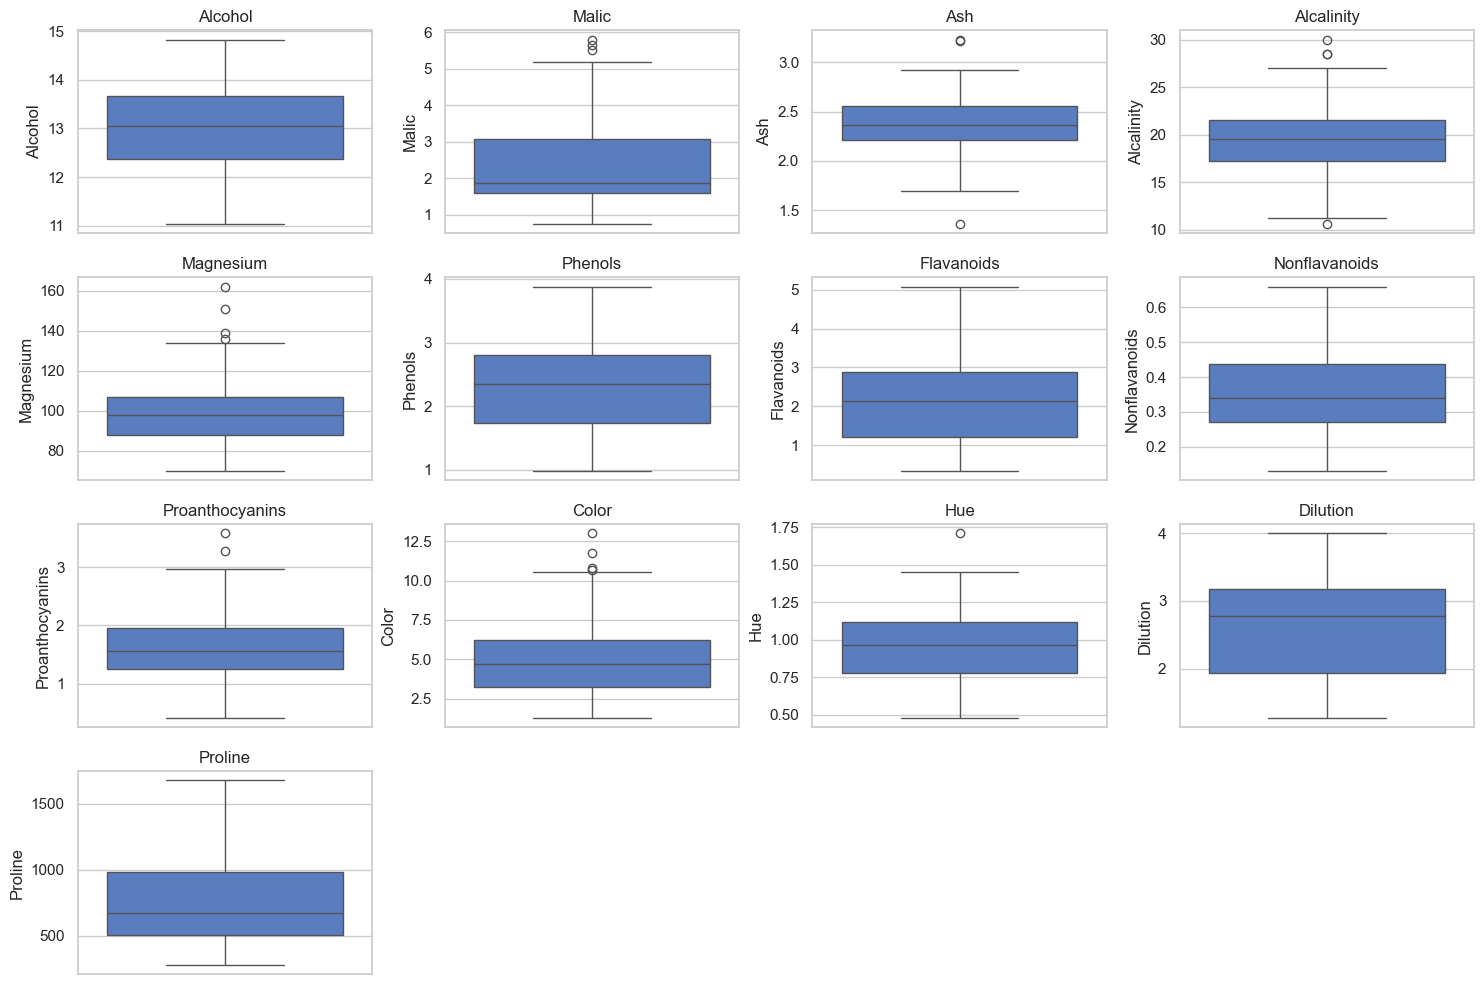

In [6]:
# Plot box plots for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[1:], 1):  # skip 'Type'
    plt.subplot(4, 4, i)
    sns.boxplot(data=data, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [7]:
#both histograms and boxplots. doesnot show any outliers

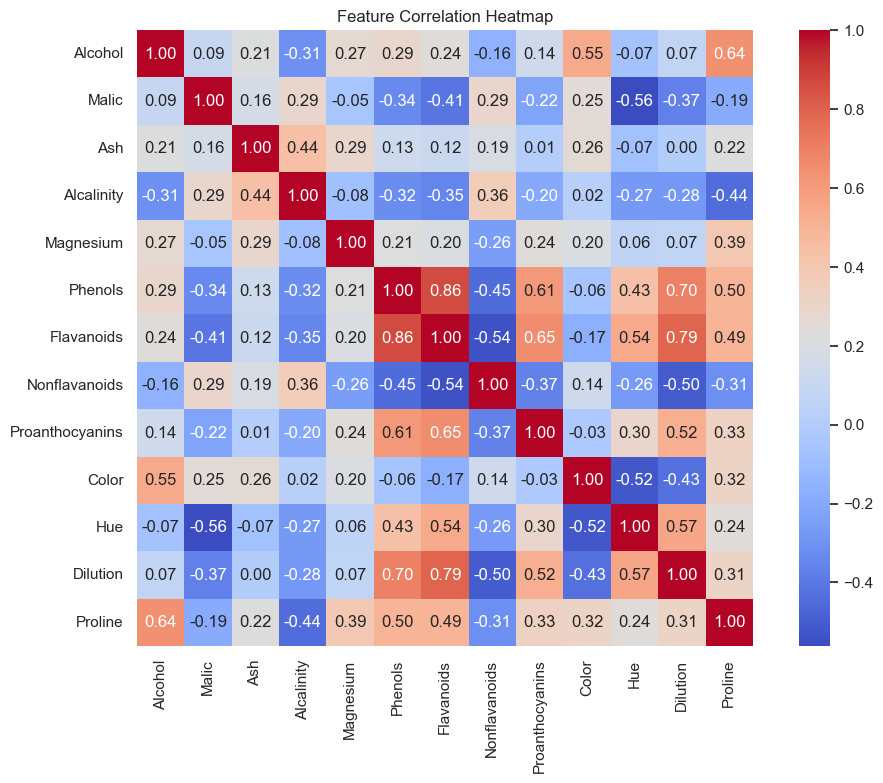

In [8]:
#Computing correlation matrix
corr = data.drop('Type', axis=1).corr()

#Plotring heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [9]:
#Strong Positive Correlations:
# These indicate that as one feature increases, the other tends to increase too.
# Phenols,Flavanoids: 0.86 Very strong correlation. Suggests they might carry similar information.
# Dilution,Flavanoids: 0.79 Strong correlation. These features are closely related in behavior.
# Proline,Alcohol: 0.64 Indicates that wines with higher alcohol tend to have higher proline.    
# Phenols,Dilution: 0.70 Another strong relationship showing they might belong to the same cluster or class.

#strong Negative Correlations:
# These indicate that as one feature increases, the other tends to decrease.
# Flavanoids,Malic Acid: -0.41 Suggests wines high in flavanoids are lower in malic acid.
# Hue,Malic Acid: -0.56 Suggests that higher malic acid is associated with lower hue (color intensity?).
# Color,Hue: -0.52 Interestingly, higher color intensity might be associated with lower hue values.

# Low or No Correlation:
# These features behave more independently of each other
# Alcohol,Nonflavanoids: -0.16
# Ash,Proanthocyanins: -0.20
# Magnesium,Nonflavanoids: -0.26


# Task 2: Dimensionality Reduction with PCA:

In [10]:
#Standardize the features to ensure they have a mean of 0 and 
#a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
from sklearn.preprocessing import StandardScaler

x = data.drop('Type', axis=1)

#standardizing the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
#applying pca
from sklearn.decomposition import PCA

#initializin PCA without limiting components yet
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

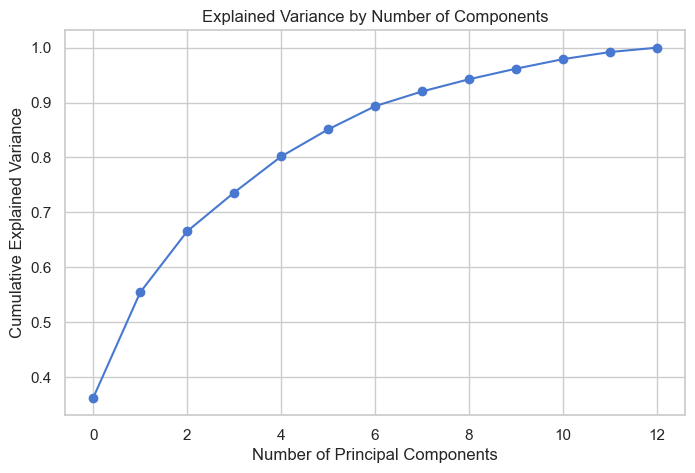

In [12]:
#variance using scree plot
import numpy as np
import matplotlib.pyplot as plt

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [13]:
#the curve starts to level off from 92%

In [14]:
#Transform the original dataset into the principal components.
#Rerun PCA with chosen number of components
pca = PCA(n_components=3)
x_pca_final = pca.fit_transform(x_scaled)

# Task 3: Clustering with Original Data:

In [15]:
#applyong kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

#Trying with 3 clusters (since we have 3 wine types)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(x_scaled)

In [16]:
#Evaluation
sil_score = silhouette_score(x_scaled, kmeans_labels)
db_score = davies_bouldin_score(x_scaled, kmeans_labels)

print(f"Silhouette Score: {sil_score:.4f}")
print(f"Davies–Bouldin Index: {db_score:.4f}")

Silhouette Score: 0.2849
Davies–Bouldin Index: 1.3892


In [17]:
#these scores show weak clustering structure

# Task 4: Clustering with PCA Data:

In [18]:
#Applying K-Means on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(x_pca_final)

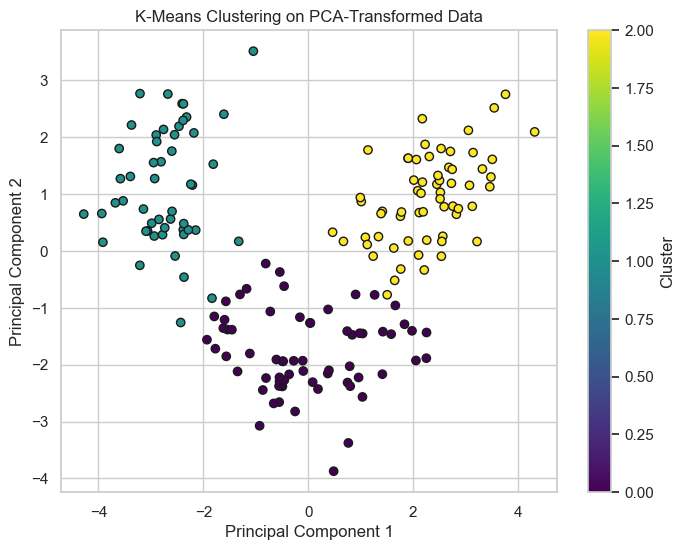

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_final[:, 0], x_pca_final[:, 1], c=kmeans_pca_labels, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering on PCA-Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [20]:
#above is the plot for 3 clustres

In [21]:
#Evaluating clustering performance
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_pca = silhouette_score(x_pca_final, kmeans_pca_labels)
db_pca = davies_bouldin_score(x_pca_final, kmeans_pca_labels)

print(f"Silhouette Score (PCA Data): {sil_pca:.4f}")
print(f"Davies–Bouldin Index (PCA Data): {db_pca:.4f}")

Silhouette Score (PCA Data): 0.4538
Davies–Bouldin Index (PCA Data): 0.8389


In [22]:
#we can see the improved resukts

# Task 5: Comparison and Analysis:

In [23]:
#Compare the clustering results obtained from the original dataset and PCA-transformed data.
#Discuss any similarities or differences observed in the clustering results.

#silhouette score old=0.2849  new=0.4538  PCA improved the compactness and separation of clusters.
#davies bouldin index old=1.3892 new=0.8389 Lower index = more compact, better-defined clusters after PCA.
#dimensionality old=13 features=3 principal components=PCA drastically reduced dimensionality while preserving structure.

In [24]:
#Reflect on the impact of dimensionality reduction on clustering performance.

#simensionality reduction helped eliminate noise and multicollinearity in the dataset, 
#leading to more meaningful clusters.

# Task 6: Conclusion and Insights

In [25]:
#Summarize the key findings and insights from the assignment.

#EDA revealed meaningful patterns, feature distributions, and correlations in the dataset, helping guide the clustering process.

#K-Means clustering on the original standardized data gave moderate performance 
#with a silhouette score of 0.2849 and Davies–Bouldin index of 1.3892.

#After applying PCA:
#Dimensionality was reduced from 13 features to 3 components.
#Clustering performance improved significantly, with:
#Silhouette Score: 0.4538
#Daviesbouldin Index: 0.8389
#PCA also made it easier to visualize clusters clearly in 2D space, revealing better separation between groups.

In [26]:
#Discuss the practical implications of using PCA and clustering in data analysis.

#PCA + Clustering is a powerful combination for:
#Simplifying complex datasets
#Improving clustering accuracy and performance
#Enhancing computational efficiency
#Making data more interpretable visually

#However,PCA may transform features into components, making it less intuitive to explain results
#in the context of original variabls

In [27]:
#Provide recommendations for when to use each technique based on the analysis conducted.

#for visualizing clusters in 2D/3D
#we need dimensionality reduction
#features are highly correlated
#dataset has many numeric features